In [76]:
from sklearn.datasets import load_breast_cancer 

In [77]:
dataset=load_breast_cancer()

In [78]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [79]:
import pandas as pd 
x=pd.DataFrame(dataset.data,columns=dataset.feature_names)
x.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
y=pd.DataFrame(dataset.target,columns=["cancer"])
y.head(2)

,cancer
0,0
1,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [83]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree_model=DecisionTreeClassifier()

In [86]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import tree

[Text(0.5984848484848485, 0.9285714285714286, 'x[22] <= 113.75\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.3939393939393939, 0.7857142857142857, 'x[27] <= 0.136\ngini = 0.161\nsamples = 305\nvalue = [27, 278]'),
 Text(0.24242424242424243, 0.6428571428571429, 'x[3] <= 715.65\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(0.15151515151515152, 0.5, 'x[23] <= 785.75\ngini = 0.022\nsamples = 264\nvalue = [3, 261]'),
 Text(0.06060606060606061, 0.35714285714285715, 'x[21] <= 33.35\ngini = 0.008\nsamples = 247\nvalue = [1, 246]'),
 Text(0.030303030303030304, 0.21428571428571427, 'gini = 0.0\nsamples = 230\nvalue = [0, 230]'),
 Text(0.09090909090909091, 0.21428571428571427, 'x[21] <= 33.56\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.06060606060606061, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12121212121212122, 0.07142857142857142, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.24242424242424243, 0.35714285714285715, 'x[

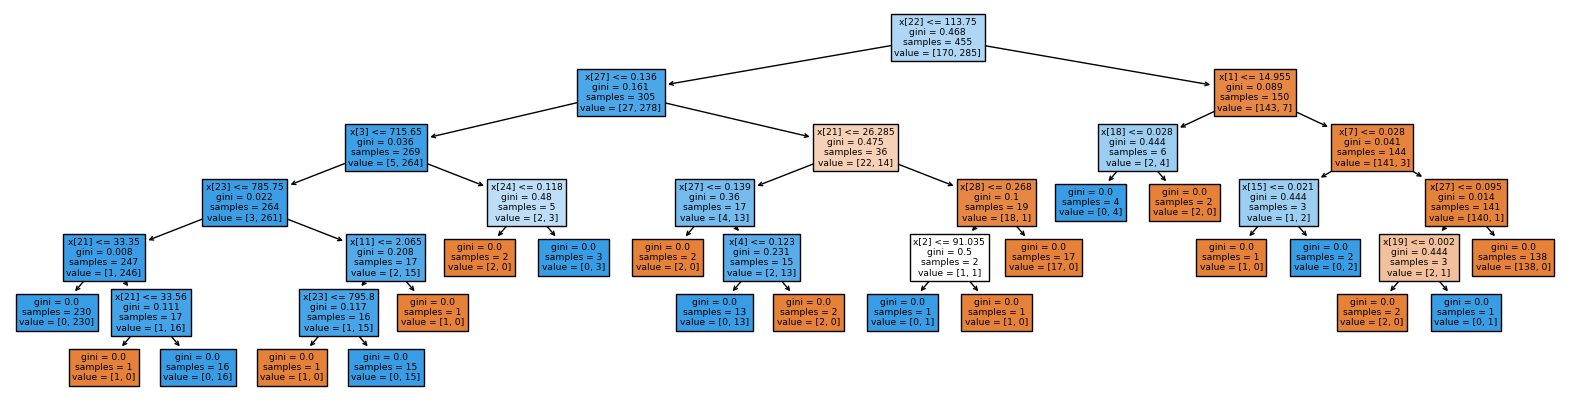

In [88]:
plt.figure(figsize=(20,5))
tree.plot_tree(tree_model,filled=True)

In [89]:
y_pred=tree_model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1])

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,y_pred)*100

89.47368421052632

<h3>using default parmeter the accuracy scorre is 92</h3>

<h5>Hyper parameter tuning using Grid cv search  </h5>

In [130]:
parameter={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,4,5,6,7],
    
}

In [131]:
tree_model2=DecisionTreeClassifier()

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
grd=GridSearchCV(tree_model2,param_grid=parameter,cv=5,scoring="accuracy")
grd

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [134]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [135]:
grd.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'random'}

In [136]:
y_pred2=grd.predict(x_test)
y_pred2

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0])

In [138]:
accuracy_score(y_test,y_pred2)*100

95.6140350877193

<h3>the accuracy score using hyperprameter is the 95</h3>

<h5>plotting using hyper paramter</h5>

In [145]:
d3=DecisionTreeClassifier(criterion="log_loss",max_depth=5,splitter="random")
d3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random')

[Text(0.6521739130434783, 0.9166666666666666, 'x[3] <= 824.625\nlog_loss = 0.953\nsamples = 455\nvalue = [170, 285]'),
 Text(0.391304347826087, 0.75, 'x[22] <= 116.646\nlog_loss = 0.71\nsamples = 350\nvalue = [68, 282]'),
 Text(0.34782608695652173, 0.5833333333333334, 'x[26] <= 0.249\nlog_loss = 0.51\nsamples = 318\nvalue = [36, 282]'),
 Text(0.17391304347826086, 0.4166666666666667, 'x[0] <= 14.949\nlog_loss = 0.151\nsamples = 231\nvalue = [5, 226]'),
 Text(0.08695652173913043, 0.25, 'x[26] <= 0.095\nlog_loss = 0.074\nsamples = 222\nvalue = [2, 220]'),
 Text(0.043478260869565216, 0.08333333333333333, 'log_loss = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(0.13043478260869565, 0.08333333333333333, 'log_loss = 0.115\nsamples = 129\nvalue = [2, 127]'),
 Text(0.2608695652173913, 0.25, 'x[9] <= 0.055\nlog_loss = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.21739130434782608, 0.08333333333333333, 'log_loss = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.30434782608695654, 0.0833333333333333

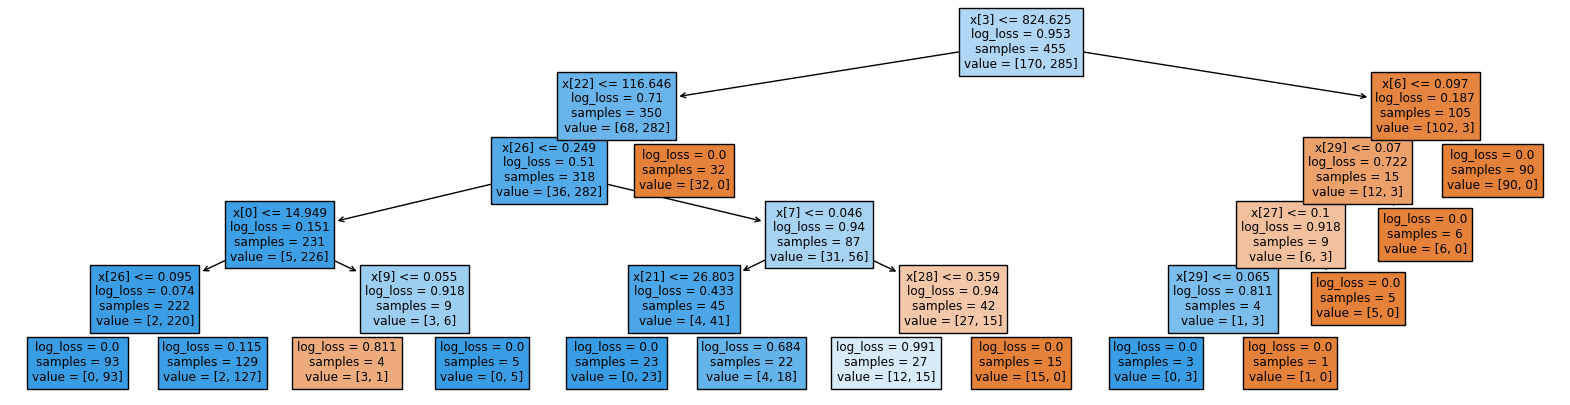

In [146]:
plt.figure(figsize=(20,5))
tree.plot_tree(d3,filled=True)